In [1]:
from src.model import DLIM
from src.utils import Data_model, train
from numpy import mean, linspace
from numpy.random import choice
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load data

In [2]:
file_name = "data/data_epis_1.csv"
nb_gene = 2 
data = Data_model(file_name, nb_gene)

# Begin training 

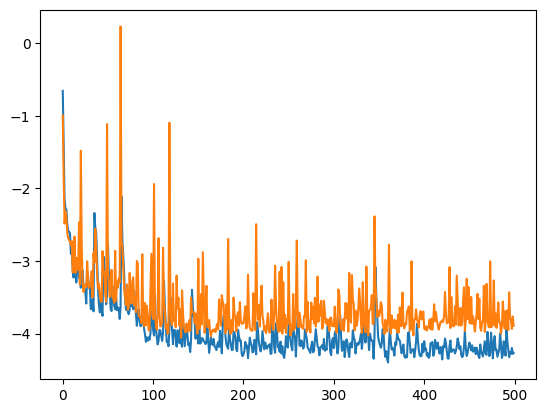

In [3]:
train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.2))
model = DLIM(nb_gene, nb_state=37, hid=16, nb_layer=0)
train_data = data[train_id, :]
val_data = data[[i for i in range(data.data.shape[0]) if i not in train_data], :]

losses = train(model, train_data, lr=1e-2, nb_epoch=500, bsize=16, val_data=val_data, wei_dec=1e-2)
train_l, val_l = zip(*losses)

# plot the training and validation curve 
plt.plot(train_l)
plt.plot(val_l)
plt.show()

# Results visualization

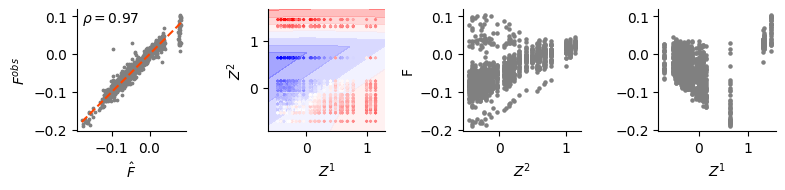

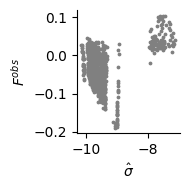

In [4]:

fit, var, _ = model(val_data[:, :-1].long(), detach=True)

fig, (ax, bx, cx, dx) = plt.subplots(1, 4, figsize=(8, 2))
ax.scatter(fit, val_data[:, [-1]].detach(), s=3, c="grey")
x = linspace(min(fit), max(fit), num=100)
y = linspace(min(fit), max(fit), num=100)
ax.plot(x, y, lw=1.5, linestyle="--", c="orangered")
ax.set_xlabel("$\\hat{F}$")
ax.set_ylabel("$F^{obs}$")
score = pearsonr(fit.flatten(), val_data[:, [-1]].flatten())[0]
ax.text(fit.min(), fit.max(), f"$\\rho={score:.2f}$")

model.plot(bx, data)

for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
    bx.spines[el].set_visible(False)
    cx.spines[el].set_visible(False)
    dx.spines[el].set_visible(False)
ax.set_aspect(1)

fit_a, var_a, lat_a = model(data[:, :-1].long(), detach=True)
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
dx.set_xlabel("$Z^1$")
cx.set_xlabel("$Z^2$")
plt.tight_layout()
# plt.savefig("./img/fit_e2.png", dpi=300, transparent=True)
plt.show()


fig, ax = plt.subplots(1, figsize=(2, 2), sharey=True)
ax.scatter(var_a.log(), data[:, [-1]], s=3, c="grey")
ax.set_xlabel("$\\hat{\\sigma}$")
ax.set_ylabel("$F^{obs}$")
for el in ["top", "right"]:
    ax.spines[el].set_visible(False)
plt.tight_layout()
# plt.savefig("./img/fit_var_e2.png", dpi=300, transparent=True)
plt.show()